<h1 align="center">Zewail City of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2020) </h2>
<h2 align="center">Lab 7: Logistic Regression </h2>
<h3 align="center">Prepared by: Aya Elzahy</h3>

#Import

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(0)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#from logistic_func import *
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier

#Classification vs Regression

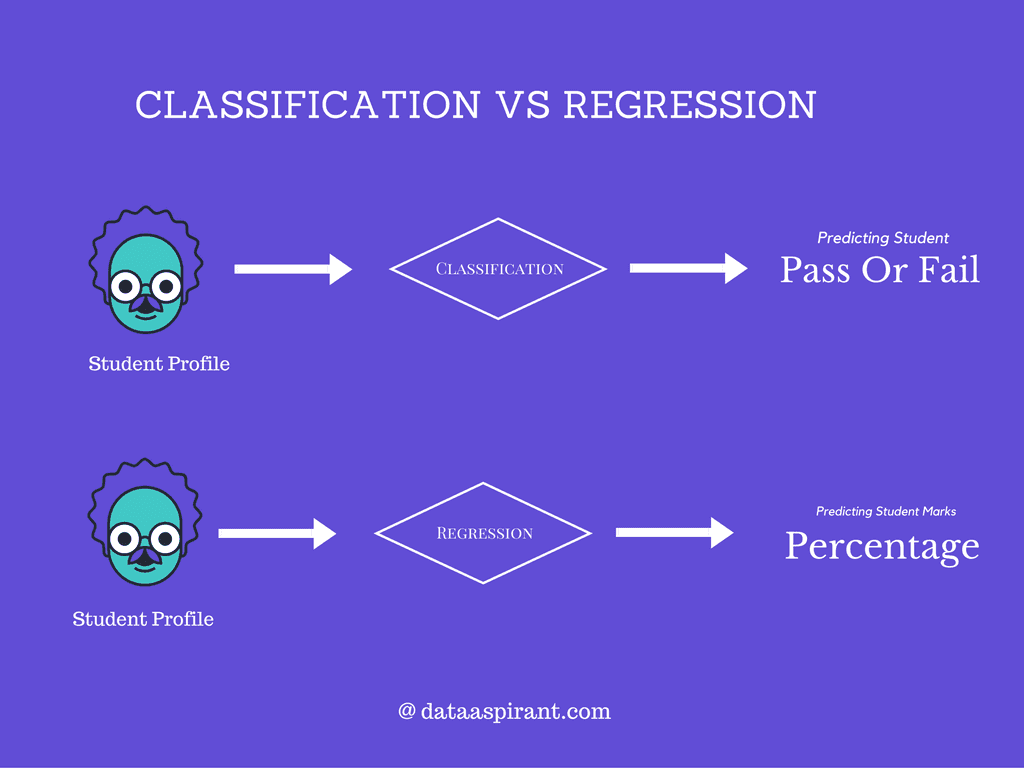

#Linear Regression vs Logistic Regression

Linear Function:

$$z = x^T w$$
Logistic Sigmoid:

$$\sigma(z) = \frac{1}{1+e^{-z}}$$
Apply Logistic Sigmoid to the Linear Function

$$y = \sigma(x^T w) = \frac{1}{1+e^{-x^T w}}$$

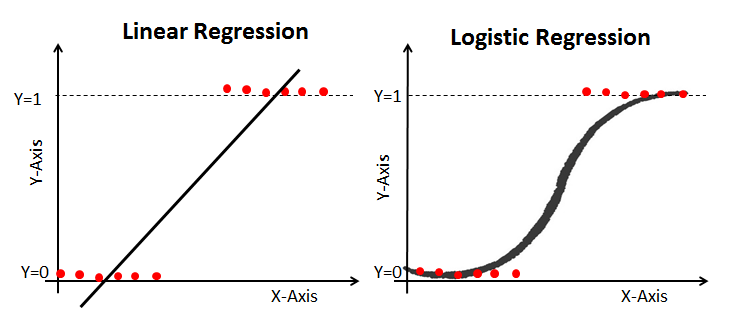

In [ ]:
#Define sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
x= np.arange(-20,20)
y= np.round(sigmoid(x),2)

Text(0, 0.5, 'Logistic/sigmoid function applied')

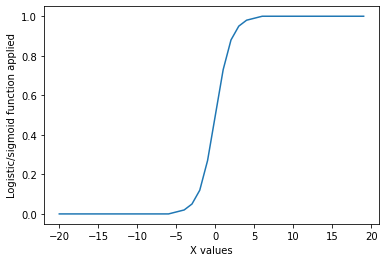

In [ ]:
plt.plot(x, y)
plt.xlabel('X values')
plt.ylabel('Logistic/sigmoid function applied')

#Classification using Sklearn Logistic Regression

This part uses functions from logistic_func.py file. You don't need to go through their implementation, as they're just used for concept demonstration purposes. 


Shape of X:  (200, 2)


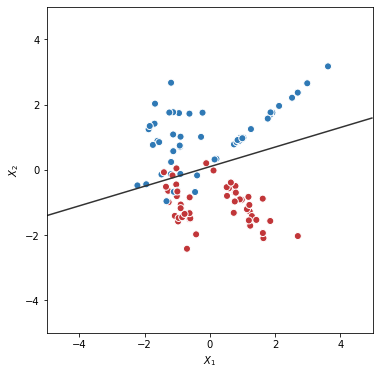

In [ ]:
X,y= synthesize_data()
print("Shape of X: ", X.shape)

#Fit a logistic regression model
clf = LogisticRegression().fit(X[:100], y[:100])

#Plot decision boundary
f, ax = plt.subplots(figsize=(8, 6))
test_and_plot_logistic_regression(ax, clf, X,y)

Text(0, 0.5, 'Logistic/sigmoid function applied')

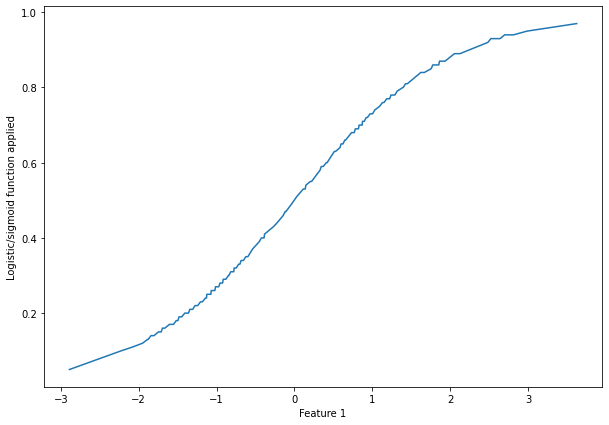

In [ ]:
#Demonstrate sigmoid output on the first feature
#Sort feature values
x1= np.sort(X[:,0])
plt.figure(figsize=(10,7))
plt.plot(x1, np.round(sigmoid(x1), 2))
plt.xlabel('Feature 1')
plt.ylabel('Logistic/sigmoid function applied')

#Implementing Logistic Regression


Logistic Regression classifies as positive when $P(C=positive | x_i)> 0.5$, that happens when $y_i> 0.5$, where$$y_i = \sigma (x_i^T w) = \frac{1}{1+e^{-x_i^T w}}$$

The overall accuracy of the model can be estimated as follow:$$accuracy = \frac{number\ of\ correct\ predictions}{total\ number\ of\ predictions} * 100\%$$

Logistic Loss

let t = training labels, y = our estimate

Loss Function:

$$J(w) = -\frac{1}{N}\sum_{i=1}^{N} t_i ln(y_i) + (1-t_i) ln(1-y_i) $$
where

$$y_i = \sigma (x_i^T w) = \frac{1}{1+e^{-x_i^T w}}$$
Derivative of Loss w.r.t weights ($w$):

$$\nabla_w J(w) = \frac{1}{N}\sum_{i=1}^N (y_i - t_i)x_i$$


## Classification functions

In [ ]:
#Define a function that classifies the input
def logistic_classify(w, X):
    y = sigmoid(np.dot(X,w))
    predictions = y > 0.5
    return predictions

def logistic_loss(w, X, t):
    loss = 0
    for x_i, t_i in zip(X,t):
        y_i = sigmoid(np.dot(x_i.T,w))
        loss -= (t_i*np.log(y_i) + (1-t_i)*np.log(1-y_i))
    N = X.shape[0]
    loss /= N
    return loss

def logistic_gradient(w, X, t):
    gradient = 0
    for x_i, t_i in zip(X,t):
        y_i = sigmoid(np.dot(x_i.T,w))
        gradient += (y_i - t_i) * x_i
    N = X.shape[0]
    gradient /= N
    return gradient

def logistic_accuracy(w, X, t):
    predictions = logistic_classify(w, X)
    correct_predictions = np.sum(predictions == t)
    accuracy = correct_predictions / len(predictions) * 100
    return accuracy

##Hyperparameter Initialization

In [ ]:
train_features= X
train_labels= y
#Initialize parameters and hyperparameters
w_old = np.random.uniform(0,0.2,train_features.shape[1])
print("Initial weights are: ", w_old)
w_new = w_old

loss_old = logistic_loss(w_old, train_features, train_labels)
print("Initial loss is: ", loss_old)
loss_new = 0
delta_loss = -10000 #difference between new loss and old loss

learning_rate = 0.5

iteration = 0
max_iterations = 30 #stop after how many iterations if the solution didn't converge

Initial weights are:  [0.06794589 0.04241108]
Initial loss is:  0.6744700898353375


##Training

In [ ]:
while (delta_loss < -0.01 and iteration < max_iterations): #stop condition
    #Get gradient
    gradient = logistic_gradient(w_old, train_features, train_labels)
    #Update weights based on gradient
    w_new = w_old - learning_rate * gradient
    w_old = w_new
    #Get loss
    loss_new = logistic_loss(w_new, train_features, train_labels)
    #Get delta loss
    delta_loss = loss_new - loss_old
    loss_old = loss_new
    
    train_accuracy = logistic_accuracy(w_new, train_features, train_labels)
    
    iteration += 1
    
    print(f"Iteration no. {iteration}, Training Accuracy = {train_accuracy:.1f}%, Training Loss = {loss_new:.2f}, Change in Loss = {delta_loss:.3f}")

Iteration no. 1, Training Accuracy = 89.0%, Training Loss = 0.57, Change in Loss = -0.101
Iteration no. 2, Training Accuracy = 89.0%, Training Loss = 0.51, Change in Loss = -0.066
Iteration no. 3, Training Accuracy = 89.0%, Training Loss = 0.46, Change in Loss = -0.046
Iteration no. 4, Training Accuracy = 89.0%, Training Loss = 0.43, Change in Loss = -0.033
Iteration no. 5, Training Accuracy = 88.5%, Training Loss = 0.40, Change in Loss = -0.025
Iteration no. 6, Training Accuracy = 88.5%, Training Loss = 0.38, Change in Loss = -0.019
Iteration no. 7, Training Accuracy = 89.0%, Training Loss = 0.37, Change in Loss = -0.015
Iteration no. 8, Training Accuracy = 89.5%, Training Loss = 0.36, Change in Loss = -0.013
Iteration no. 9, Training Accuracy = 90.0%, Training Loss = 0.35, Change in Loss = -0.010
Iteration no. 10, Training Accuracy = 90.0%, Training Loss = 0.34, Change in Loss = -0.009


In [ ]:
print("Model coefficients are: ", w_new)

Model coefficients are:  [-0.16131256  1.26470642]


#Titanic Dataset

##Data loading

In [101]:
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Variable Notes**

pclass: A proxy for socio-economic status (SES)

1= Upper

2= Middle

3= Lower

**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

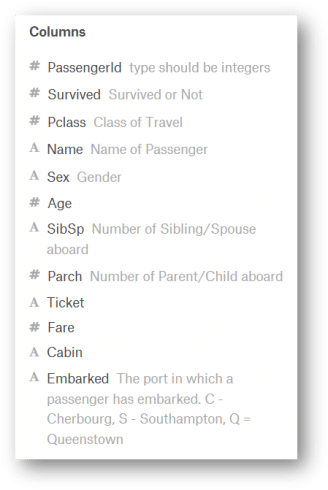

##Data exploration

In [102]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###How many men and women were there?

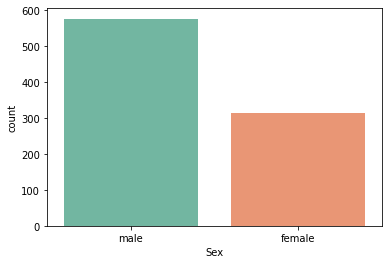

In [104]:
sns.countplot(x='Sex', data=titanic, palette='Set2')
plt.show()

We see that more males were on the ship than females. 

###Count of class


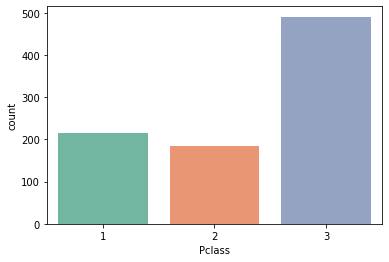

In [105]:
sns.countplot(x='Pclass', data=titanic, palette='Set2')
plt.show()

Most people were travelling on class 3 (low classer)

###How many people survived?

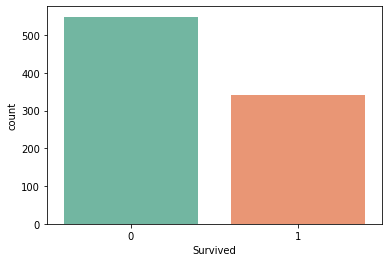

In [106]:
sns.countplot(x='Survived', data=titanic, palette='Set2')
plt.show()

###How many people survived per class?


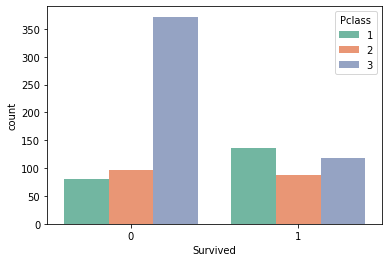

In [107]:
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='Set2')

More people in the upper class survived than not. The opposite it true for the lower class.

###How many males and females survived?


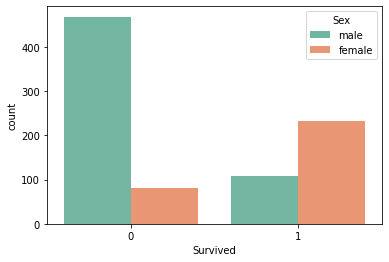

In [108]:
sns.countplot(x='Survived', hue='Sex', data=titanic, palette='Set2')

We see that more females survived than not. The opposite is true for males. 

##Data cleaning

###Missing values

####Age

In [109]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

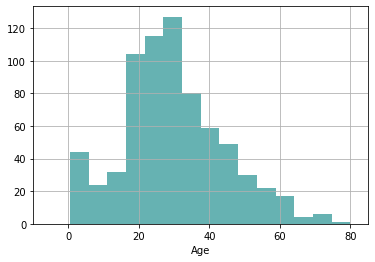

Mean of age=  29.69911764705882
Median of age=  28.0


In [110]:
ax = titanic['Age'].hist(bins=15, color='teal', alpha=0.6)
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()
age_mean= titanic['Age'].mean()
age_median= titanic['Age']. median()
print("Mean of age= ", age_mean)
print("Median of age= ", age_median)

We can use the median value to fill in the missing ages since age is sckewed to the right

In [111]:
titanic_median_age= titanic.copy()
titanic_median_age['Age'].fillna(age_median, inplace= True)

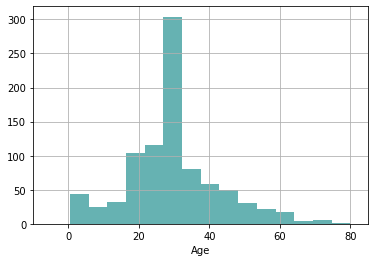

In [112]:
ax = titanic_median_age['Age'].hist(bins=15, color='teal', alpha=0.6)
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Is this the best approach? What are other possible approaches?

Let's explore the average age per class

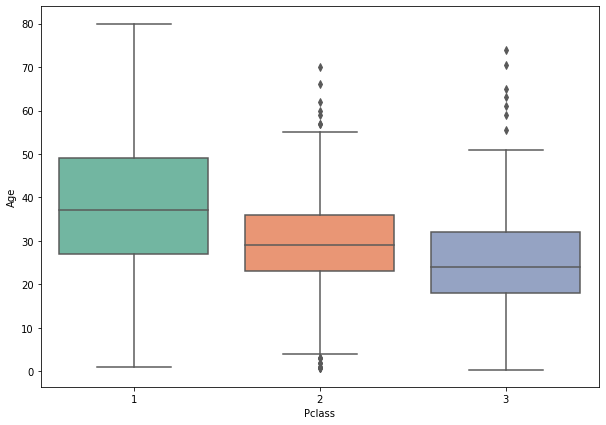

In [113]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic, palette='Set2')


Let’s impute average age values to null age values based on class


In [114]:
def get_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        condition= titanic['Pclass'] == Pclass
        return int(titanic[condition]['Age'].mean())
    else:
        return Age

In [115]:
#Apply a function along an axis of the DataFrame.
titanic['Age'] = titanic[['Age', 'Pclass']].apply(get_age,axis=1)

Let's see if we're still close to the distribution of age per class

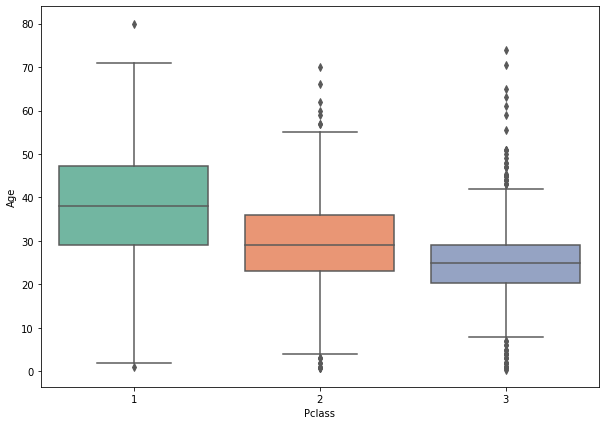

In [116]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic, palette='Set2')

compared to titanic median age

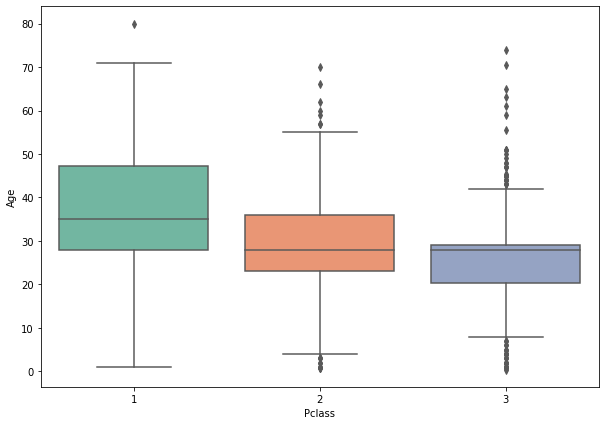

In [117]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic_median_age, palette='Set2')

####Cabin

In [118]:
print('Percent of missing Cabin records is %.2f%%' %((titanic['Cabin'].isnull().sum()/titanic.shape[0])*100))

Percent of missing Cabin records is 77.10%


What do you think we should do with this column?

Since the majority of cabin records are missing, we will drop this column. 

In [119]:
titanic.drop('Cabin', axis=1, inplace=True)

####Embarked

How do you suggest we impute the missing values of this feature?

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


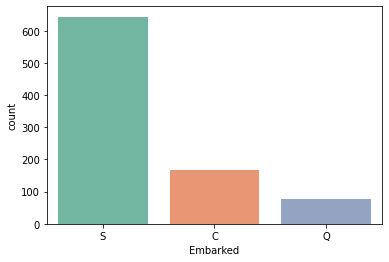

In [120]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(titanic['Embarked'].value_counts())
sns.countplot(x='Embarked', data=titanic, palette='Set2')
plt.show()

The majority of passengers boarded in Southhampton, so we'll impute the 2 NaN values with "S".

We can also just drop these 2 values.




In [121]:
titanic['Embarked'].fillna('S', inplace=True)

In [122]:
#Check if there are still missing values 
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

###Drop uncorrelated columns

Passenger ID and name couldn't possibly contribute to survival.

In [123]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035388,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.050118,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.403923,0.083081,0.018443,-0.549500
Age,0.035388,-0.050118,-0.403923,1.000000,-0.243110,-0.174824,0.121503
SibSp,-0.057527,-0.035322,0.083081,-0.243110,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.174824,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.121503,0.159651,0.216225,1.000000


Survived is mostly correlated with Pclass abd Fare. 
Survived is least correlated with passenger ID. 

In [124]:
titanic.drop(['PassengerId', 'Name'],inplace=True,axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


Let's also drop the Ticket column since it has so many unique values for the ticket type

In [125]:
titanic['Ticket'].value_counts()

347082             7
1601               7
CA. 2343           7
347088             6
CA 2144            6
                  ..
SOTON/OQ 392086    1
11769              1
349218             1
4137               1
W./C. 6609         1
Name: Ticket, Length: 681, dtype: int64

In [126]:
titanic.drop(['Ticket'],inplace=True,axis=1)

###One hot encoding of categorical variables

In [127]:
titanic=pd.get_dummies(titanic, columns=["Pclass","Embarked", "Sex"])
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


Since sex can only be assigned 2 values, we can drop one of the 2 encoded columns. 

In [128]:
titanic.drop(['Sex_male'],inplace=True,axis=1)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0


In [129]:
titanic.corr()['Survived']

Survived      1.000000
Age          -0.050118
SibSp        -0.035322
Parch         0.081629
Fare          0.257307
Pclass_1      0.285904
Pclass_2      0.093349
Pclass_3     -0.322308
Embarked_C    0.168240
Embarked_Q    0.003650
Embarked_S   -0.149683
Sex_female    0.543351
Name: Survived, dtype: float64

#Training a logistic regression model 

In [130]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [131]:
logmodel = LogisticRegression(max_iter= 150)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
accuracy_score(y_test, predictions)

0.7910447761194029

### Feature Selection: Recursive Feature Elimination

**Feature selection** refers to techniques that select a subset of the most relevant features (columns) for a dataset. Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Some machine learning algorithms can be misled by irrelevant input features, resulting in worse predictive performance.


**RFE works by** searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.







RFE is a transform. To use it, first the class is configured with the chosen algorithm specified via the “estimator” argument and the number of features to select via the “n_features_to_select” argument.



In [132]:
model = LogisticRegression(max_iter= 150)
rfe = RFE(estimator= model, n_features_to_select=2)
rfe = rfe.fit(X_train, y_train)
selected_features= list(X_train.columns[rfe.support_])
# summarize the selection of the attributes
print(selected_features)

['Pclass_3', 'Sex_female']


In [133]:
X = titanic[selected_features]
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
accuracy_score(y_test, predictions)

0.7649253731343284

Here the accuracy of the very small subset is very close to that of the whole training data. The tradeoff in this particular case is between slight improvement in accuracy and a huge reduction in feature dimensionality. 

#Task

In this task, you'll be working with the heart attack dataset (https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility) 
- Propose at least 2 questions about the dataset. (1 mark)
- Use visualizations and relations between variables to support your analysis in answering these questions. (4 marks)
- Perform any necessary cleaning steps. (2 marks)
- Fit a logistic regression model. (1 mark)
- Report model performance. (0.5 marks)
- Discuss your findings and observations. (1 mark)
- Discuss dataset limitations. (0.5 marks)
- 2 bonus marks for organized notebooks with detailed analysis and logical flow of conclusions. 

#References

- Hands-on Machine Learning with Scikit-learn, Keras & Tensorflow, 2nd Edition
- https://datascienceplus.com/logistic-regression-with-python-using-titanic-data/ 
- https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python 
- https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
- https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python 
- https://github.com/MohamedAbdelsalam9/CIE417/blob/master/Tutorials/Lab3_Logistic_Regression/Lab3_Logistic_Regression_Solved.ipynb 
- https://machinelearningmastery.com/rfe-feature-selection-in-python/ 

#Part II

#Model Assessment

##Confusion Matrix

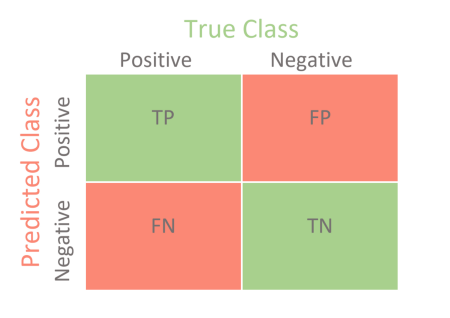

In [134]:
confusion_matrix(y_test, predictions)

array([[132,  22],
       [ 41,  73]])

Each row in a confusion matrix represents an actual class, while each column represents a predicted class. 

A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right)

##Precision, Recall and Accuracy

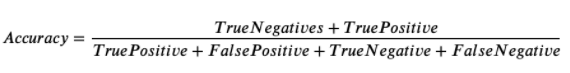

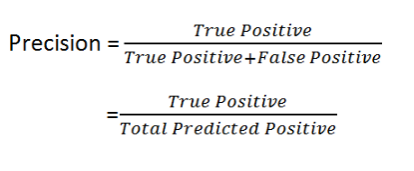

Out of those predicted positive, how many of them are actual positive? 

Precision is a good measure to determine, when the costs of False Positive is high. For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.

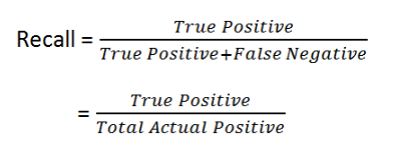

Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.

Similarly, in sick patient detection. If a sick patient (Actual Positive) goes through the test and predicted as not sick (Predicted Negative). The cost associated with False Negative will be extremely high if the sickness is contagious.

**F1 Score**

It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values.

As a result, the classifier will only get a high F1 score if both recall and precision are high.

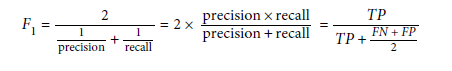

In [169]:
accuracy_score(y_test, predictions)

0.7649253731343284

In [170]:
precision_score(y_test, predictions)

0.7684210526315789

In [171]:
recall_score(y_test, predictions)

0.6403508771929824

In [172]:
f1_score(y_test, predictions)

0.6985645933014354

##ROC AUC Curve

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances).

We can change the classification threshold to a value other than 0.5 depending on which class is more critical to classify correctly. This will result in a different number of false positives and negatives. The ROC curve summarizes a number of confusion matrices for a number of thresholds. 

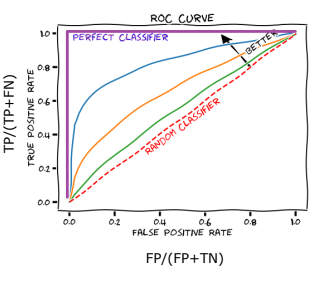

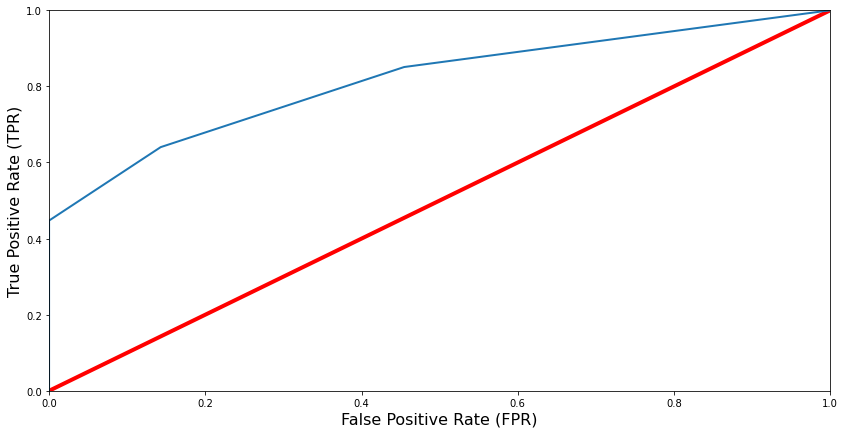

In [195]:
logreg_prob= logmodel.predict_proba(X_test)[:,1]
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, logreg_prob)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plt.plot([0, 1], [0, 1], 'r', linewidth=4)

plot_roc_curve(false_positive_rate, true_positive_rate)

thresholds[0] represents no instances being predicted
    and is arbitrarily set to max(y_score) + 1

In [174]:
print("Thresholds: ", thresholds)
print("True positive rate: ", true_positive_rate)
print("False positive rate: ", false_positive_rate)

Thresholds:  [1.84032142 0.84032142 0.57470857 0.29520395 0.09710836]
True positive rate:  [0.         0.44736842 0.64035088 0.85087719 1.        ]
False positive rate:  [0.         0.         0.14285714 0.45454545 1.        ]


The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible.

The top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

##ROC AUC Score

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [175]:
r_a_score = roc_auc_score(y_test, logreg_prob)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8148781043517884


##Multiple ROC Curves

AUC score for logistic regression is  0.8148781043517884  and for KNN is  0.7807017543859649


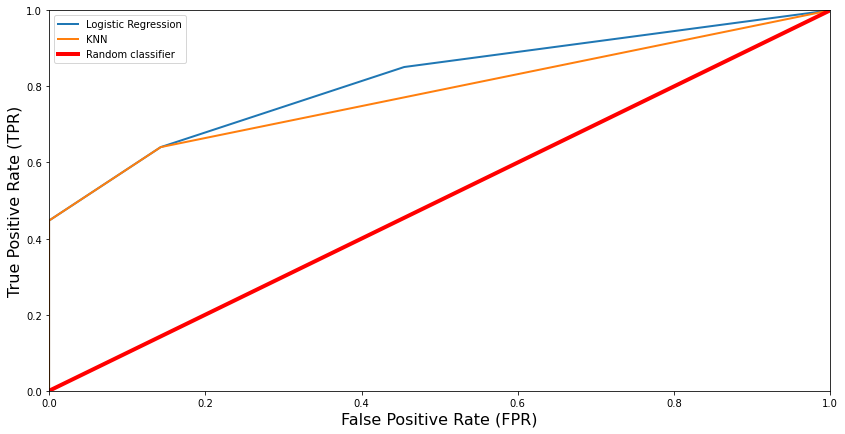

In [202]:
clf2 = KNeighborsClassifier()
clf2.fit(X_train,y_train)

# compute true positive rate and false positive rate
fp1, tp1, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
fp2, tp2, thresholds = roc_curve(y_test, clf2.predict_proba(X_test)[:,1])

plt.figure(figsize=(14, 7))

plot_roc_curve(fp1, tp1)
plot_roc_curve(fp2, tp2)
plt.plot([0, 1], [0, 1], 'r', linewidth=4)

plt.legend(['Logistic Regression', 'KNN', 'Random classifier'])

auc1 = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
auc2 = roc_auc_score(y_test, clf2.predict_proba(X_test)[:,1])
print("AUC score for logistic regression is ", auc1, " and for KNN is ", auc2)

The AUC for logistic regression ROC is greater than the AUC for KNN ROC, suggesting that logistic regression is a better fit for this problem.

#Multiclass Logistic Regression

##One Vs Rest Logistic regression

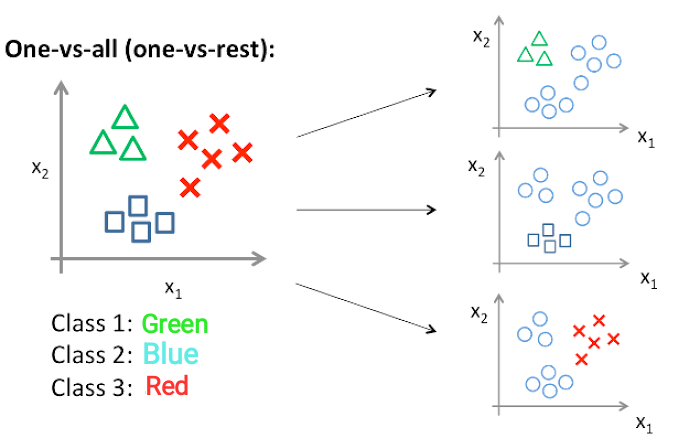

Here is how OvR works. Suppose you have 3 target classes, A,B, and C. First you treat B and C as one class, D and run a logistic regression. This classifier separates A and D. Next you treat A and C as D, and so on. You will have 3 independent logistic regressions.

When you predict, you will run the 3 classififers. Each one gives the probability of the class associated with it. Whichever has the highest probability is the most probable class.

##One Vs. One Logistic Regression

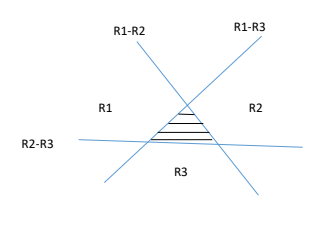

##Multinomial Logistic Regression

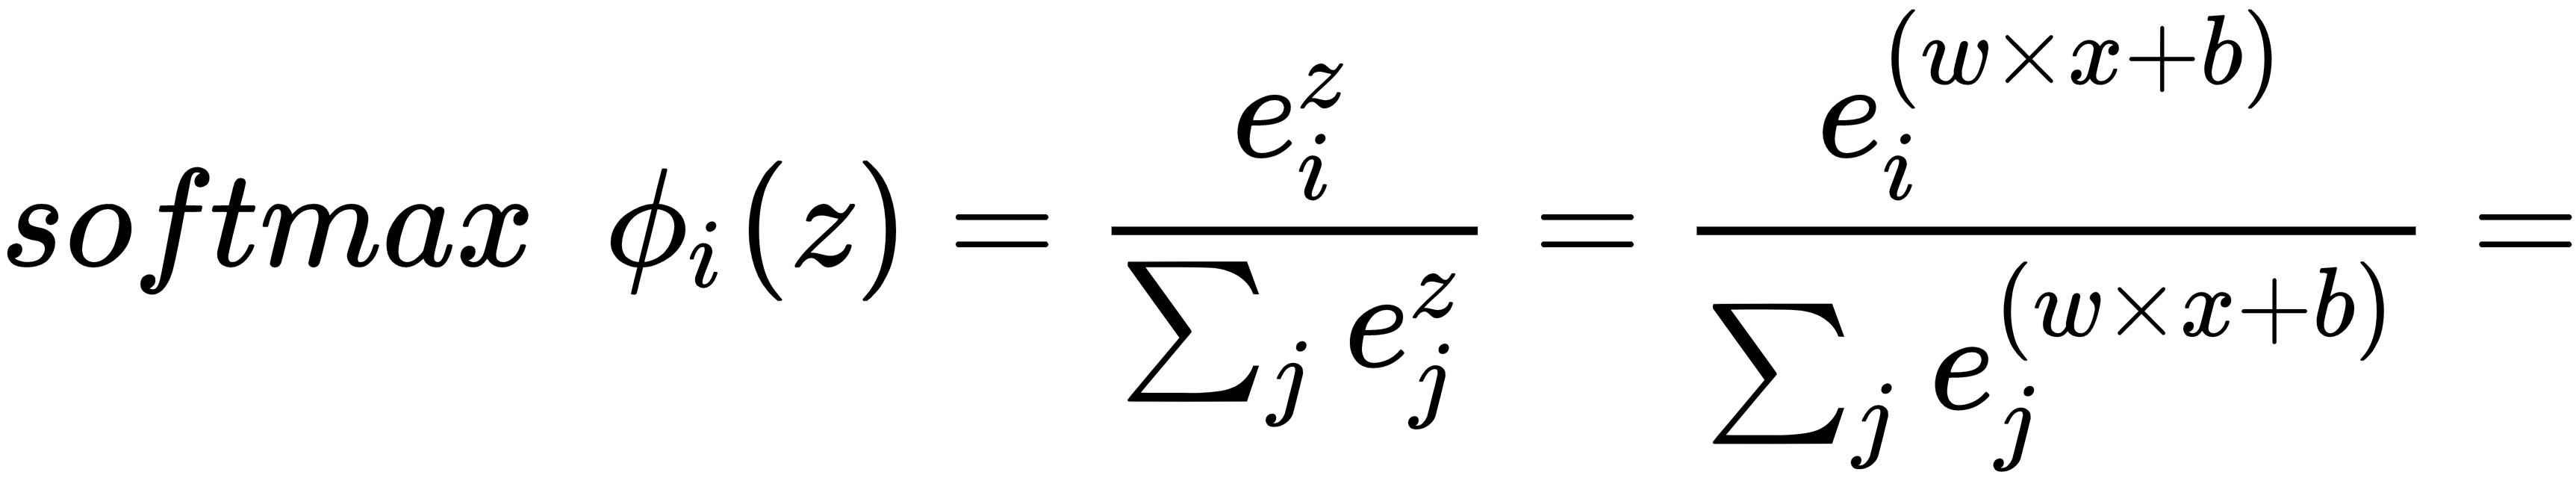

The standard exponential function is applied to each element of the input vector. This gives a positive value above 0, which will be very small if the input was negative, and very large if the input was large. However, it is still not fixed in the range (0, 1) which is what is required of a probability.


the sigmoid function is a special case of the softmax function for a classifier with only two input classes. We can show this if we set the input vector to be [x, 0] and calculate the first output element with the usual softmax formula:


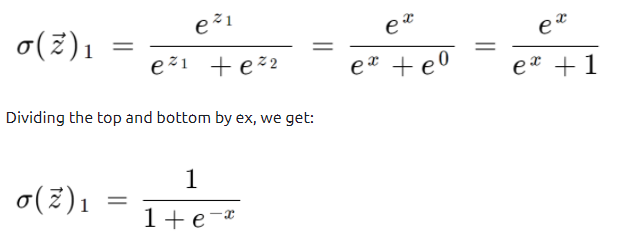

In [178]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0) 

In [179]:
logits= [2.0, 1.0, 0.1]
softmax_prob= softmax(logits)
print(softmax_prob)
print("Sum of softmax probabilities= ", sum(softmax_prob))

[0.65900114 0.24243297 0.09856589]
Sum of softmax probabilities=  1.0


##Comparison

LogisticRegression(multi_class=  )

multi_class : {'auto', 'ovr', 'multinomial'}, 

default='auto'

    If the option chosen is 'ovr', then a binary problem is fit for each
    label. 
    'auto' selects 'ovr' if the data is binary,
    and otherwise selects 'multinomial'.

Once a classification machine learning algorithm divides a feature space, we can then classify each point in the feature space, on some arbitrary grid, to get an idea of how exactly the algorithm chose to divide up the feature space.

This is called a decision surface or decision boundary, and it provides a diagnostic tool for understanding a model on a classification predictive modeling task.

###Synthetic data

In [180]:
#Synthetic Classification Dataset
#make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]  #Center of each class 
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40) #Number of features is 2 by default.
print("sample of X: ", X[0:5])
print("sample of y: ", y[0:5])

sample of X:  [[-5.09227256  0.87072588]
 [-4.76257213 -0.39181357]
 [-6.3026177  -0.16682567]
 [ 3.90197303 -0.78399462]
 [ 0.970112    2.18421299]]
sample of y:  [0 0 0 2 1]


###Scatter plot of training data

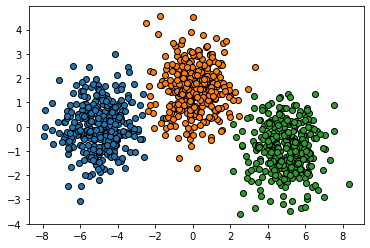

In [181]:
num_classes= 3
for i in range (num_classes):
  # get row indeces for samples with this class label
  idx = np.where(y == i)
  #Create a scatter plot
  plt.scatter(X[idx, 0], X[idx, 1], cmap=plt.cm.Paired, edgecolor='black')

###Fit a OVR logistic regression classifier

In [182]:
clf = LogisticRegression(random_state=42, multi_class='ovr')
clf.fit(X, y)  #Fit a logistic regression classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [183]:
clf.coef_

array([[-3.16271114, -0.86646154],
       [ 0.17985619,  2.10129045],
       [ 2.80141272, -1.76370192]])

In [184]:
clf.predict_proba([[0,1]])

array([[7.32920005e-04, 9.98688881e-01, 5.78199087e-04]])

###Plot decision surfaces

We can create a decision surface by fitting a model on the training dataset, then using the model to make predictions for a grid of values across the input domain.

Once we have the grid of predictions, we can plot the values and their class label.

A scatter plot could be used if a fine enough grid was taken. A better approach is to use a contour plot that can interpolate the colors between the points.

The contourf() Matplotlib function can be used.

This requires a few steps.

First, we need to define a grid of points across the feature space.

To do this, we can find the minimum and maximum values for each feature and expand the grid one step beyond that to ensure the whole feature space is covered.

In [185]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  #Extend the axis one step beyond the min and max values
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

We can then create a uniform sample across each dimension using the arange() function at a chosen resolution h. 



In [186]:
h = .02  # step size in the mesh
x1grid= np.arange(x_min, x_max, h)
x2grid= np.arange(y_min, y_max, h)
print("Sample of X1 grid: ", x1grid[0:5])
print("Sample of X2 grid: ", x2grid[0:5])
print("Shape of X1 grid: ", x1grid.shape)
print("Shape of X2 grid: ", x2grid.shape)

Sample of X1 grid:  [-8.91223688 -8.89223688 -8.87223688 -8.85223688 -8.83223688]
Sample of X2 grid:  [-4.594482 -4.574482 -4.554482 -4.534482 -4.514482]
Shape of X1 grid:  (911,)
Shape of X2 grid:  (508,)


Now we need to turn this into a grid.

We can use the meshgrid() NumPy function to create a grid from these two vectors.

If the first feature x1 is our x-axis of the feature space, then we need one row of x1 values of the grid for each point on the y-axis.

Similarly, if we take x2 as our y-axis of the feature space, then we need one column of x2 values of the grid for each point on the x-axis.

The meshgrid() function will do this for us, duplicating the rows and columns for us as needed. It returns two grids for the two input vectors. The first grid of x-values and the second of y-values, organized in an appropriately sized grid of rows and columns across the feature space.

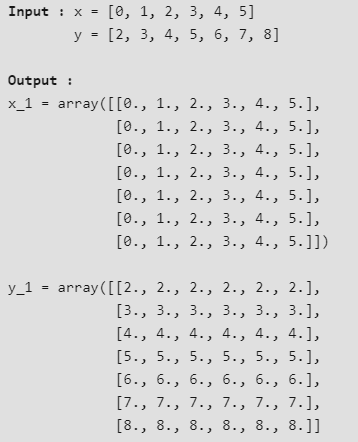

In [187]:
xx, yy = np.meshgrid(x1grid,x2grid)
print(xx.shape)
print(yy.shape)

(508, 911)
(508, 911)


We then need to flatten out the grid to create samples that we can feed into the model and make a prediction.

To do this, first, we flatten each grid into a vector.



In [188]:
xx_flattened= xx.ravel()
yy_flattened= yy.ravel()
print("Shape of reshaped grid ", xx_flattened.shape)

Shape of reshaped grid  (462788,)


Then we stack the vectors side by side as columns in an input dataset, e.g. like our original training dataset, but at a much higher resolution.

In [189]:
grid= np.c_[xx_flattened, yy_flattened]
print(grid.shape)

(462788, 2)


We can then feed this into our model and get a prediction for each point in the grid.



In [190]:
Z = clf.predict(grid)
print(Z.shape)

(462788,)


Next, we need to plot the grid of values as a contour plot.

The contourf() function takes separate grids for each axis, just like what was returned from our prior call to meshgrid(). Great!

So we can use xx and yy that we prepared earlier and simply reshape the predictions from the model to have the same shape.

In [191]:
Z = Z.reshape(xx.shape)

Contour plot

Parameters

X, Y : array-like, optional
    The coordinates of the values in Z.

*X* and *Y* must both be 2-D with the same shape as *Z* (e.g.
created via `numpy.meshgrid`)

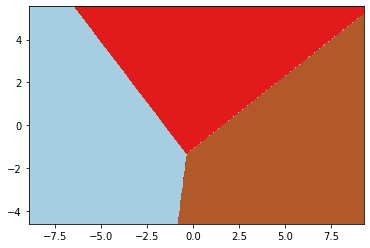

In [192]:
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

We can then plot the actual points of the dataset over the top to see how well they were separated by the logistic regression decision surface.



###Putting it all together and comparing

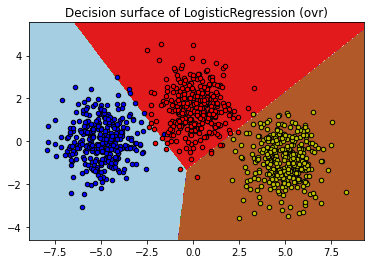

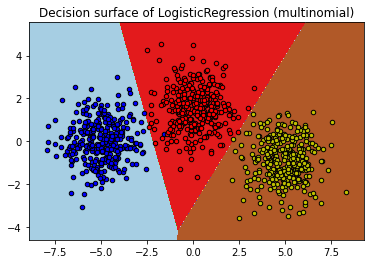

In [193]:
#Synthetic Classification Dataset
#make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]  #Center of each class 
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40) #Number of features is 2 by default.


#OVS vs Multinomial
for multi_class in ('ovr', 'multinomial'):
    clf = LogisticRegression(random_state=42, multi_class=multi_class).fit(X, y)  #Fit a logistic regression classifier

    # create a mesh to plot in
    #The first feature defines the x axis and the second defines the y axis
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  #Extend the axis one step beyond the min and max values
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        # get row indeces for samples with this class label
        idx = np.where(y == i)
        #Create a scatter plot and assign a color for all samples of the same class
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

plt.show()

#Task

- Evaluate your logistic regression model (on heart attack daatset) from previous lab according to the evaluation metrics you learnt in this lab. Comment on each score and indicate whether or not you think the used metric is suitable for this particular problem. [5 marks] 

- Fit another classifier (i.e. KNN, decision trees,...) to the data and compare between its ROC curve and that of the logistic regression. [5 marks]

#References

https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html

https://deepai.org/machine-learning-glossary-and-terms/softmax-layer

https://machinelearningmastery.com/plot-a-decision-surface-for-machine-learning/